<a href="https://colab.research.google.com/github/Ibraheem101/mlops/blob/main/Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import json
import torch
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SEED = 1234

In [3]:
np.random.seed(seed = SEED)
random.seed(SEED)

It is common practice to set the seed for both NumPy and the Python built-in random module to ensure consistency across different parts of your code that may use either of these libraries for random number generation.

In [6]:
# Load data
url = "https://raw.githubusercontent.com/GokuMohandas/Made-With-ML/main/datasets/spiral.csv"
df = pd.read_csv(url, header=0) # load and set first row as column header
df = df.sample(frac=1).reset_index(drop=True) # shuffle to create randomness
df.head()


,X1,X2,color
0,0.106737,0.114197,c1
1,0.311513,-0.664028,c1
2,0.019870,-0.703126,c1
3,-0.054017,0.508159,c3
4,-0.127751,-0.011382,c3


In [9]:
# Data shapes
X = df[["X1", "X2"]].values
y = df["color"].values
print ("X: ", np.shape(X))
print ("y: ", np.shape(y))

X:  (1500, 2)
y:  (1500,)


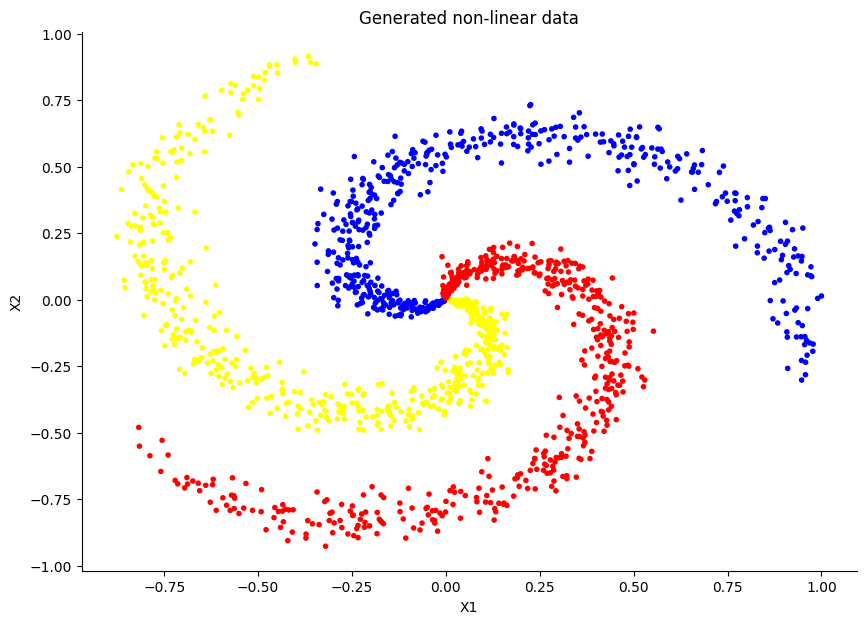

In [23]:
# Visualize data
plt.figure(figsize = (10, 7))
plt.title("Generated non-linear data")
plt.xlabel("X1"), plt.ylabel("X2")
colors = {'c1': 'red', 'c2': 'yellow', 'c3': 'blue'}
plt.scatter(x = X[:, 0], y = X[:, 1], c = [colors[color] for color in y], marker = '.')
sns.despine()

### Split data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
TRAIN_SIZE = 0.7
VAL_SIZE = 0.15
TEST_SIZE = 0.15

In [26]:
# Function to split data
def split_train_val_test(X, y, train_size):
  X_train, X_, y_train, y_ = train_test_split(X, y, train_size=0.7, stratify = y)
  X_test, X_val, y_test, y_val = train_test_split(X_, y_, test_size = 0.5, stratify = y_)
  return X_train, X_val, X_test, y_train, y_val, y_test

The stratify=y argument ensures that the class distribution is preserved in the train-test split. It means that the proportions of different classes in the original data will be maintained in both the training and testing subsets.

In [27]:
X_train, X_val, X_test, y_train, y_val, y_test = split_train_val_test(X, y, TRAIN_SIZE)

In [29]:
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")
print (f"Sample point: {X_train[1]} → {y_train[1]}")

X_train: (1050, 2), y_train: (1050,)
X_val: (225, 2), y_val: (225,)
X_test: (225, 2), y_test: (225,)
Sample point: [0.09310622 0.1128395 ] → c1


### Label Encoding